In [1]:
from UTILITY_quickstart import *

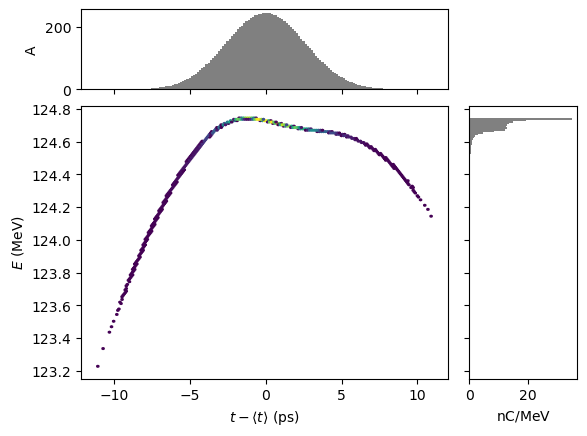

In [2]:
# Load the beam at HTRUNDF in Particle Group format
inputBeam = ParticleGroup('beamAtHTRUNDFpreLH.h5')
inputBeam.plot('delta_t','energy');

0.0005


/var/folders/3j/4b_6gm4j44z6mpdlh3f3ggjc0000gn/T/ipykernel_18734/2405489280.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_energy = np.abs(np.trapz(tvector,Pvector))
/var/folders/3j/4b_6gm4j44z6mpdlh3f3ggjc0000gn/T/ipykernel_18734/2405489280.py:13: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  print(np.abs(np.trapz(tvector,Pvector)))


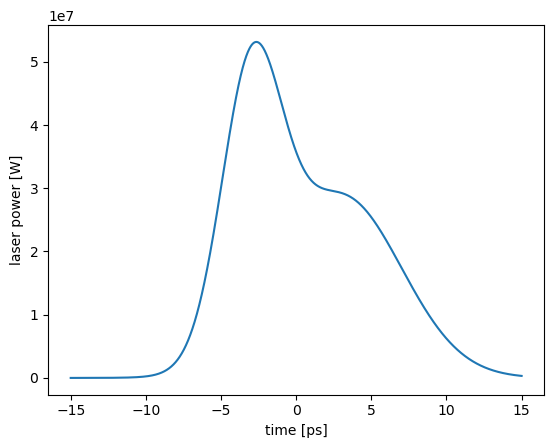

In [3]:
# Define an arbitrary laser power profile - e.g. sum of 2 Gaussians w different sigmas and offsets
Elaser = 0.5e-3;
tvector = np.linspace(-15e-12,15e-12,10000);
sigmat_laser1 = 2e-12;
sigmat_laser2 = 4e-12;
offset1 = -3e-12;
offset2 = 3e-12;
amp1 = 1.5;
amp2 = 1;
Pvector = amp1*np.exp(-0.5*((tvector - offset1) / sigmat_laser1)**2) +  amp2*np.exp(-0.5*((tvector - offset2) / sigmat_laser2)**2)
total_energy = np.abs(np.trapz(tvector,Pvector)) 
Pvector = Pvector*(Elaser/total_energy)# Normalize to the total laser energy
print(np.abs(np.trapz(tvector,Pvector)))
plt.plot(tvector*1e12,Pvector);plt.xlabel('time [ps]');plt.ylabel('laser power [W]')
plt.show()

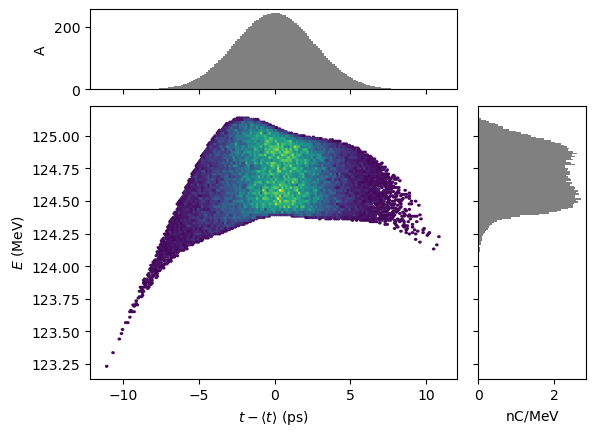

In [4]:
# Call the function to add the LH modulation
beamAfterLHmodulation, deltagamma, t = addLHmodulation(
    inputBeam, 
    Elaser,
    PowerProfile=Pvector,  # Use this for 'arbitrary' case
    tvector=tvector,            # Use this for 'arbitrary' case
    case='arbitrary',
    showplots=False              # Set to True if you want to see plots
)
beamAfterLHmodulation.plot('delta_t','energy');

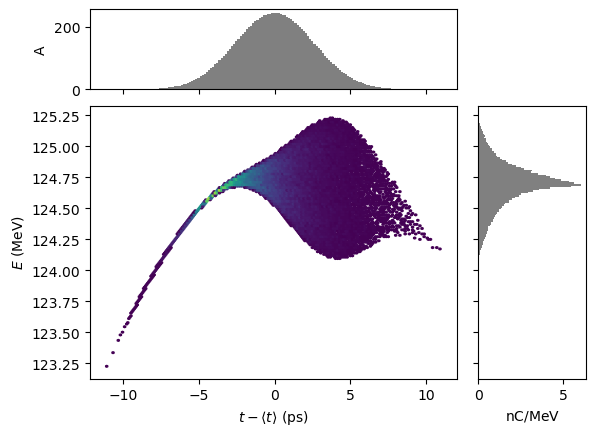

In [6]:
# Call the function to add the LH modulation
beamAfterLHmodulation, deltagamma, t = addLHmodulation(
    inputBeam, 
    Elaser,
    case='Gaussian',
    sigmat_laser=2e-12,  # Optional, only for Gaussian case
    offset=4e-12, 
    showplots=False      # Set to True if you want to see plots
)
beamAfterLHmodulation.plot('delta_t','energy');

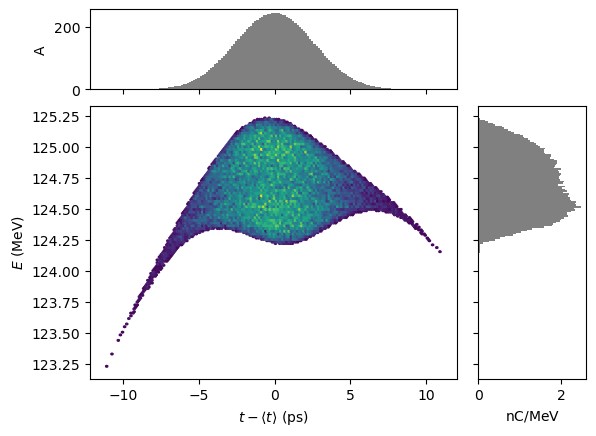

In [7]:
# Call the function specifying only the LH energy (defaults to Gaussian with 6ps FWHM and 0 offset).
beamAfterLHmodulation, deltagamma, t = addLHmodulation(
    inputBeam, 
    Elaser,    
    showplots=False      # Set to True if you want to see plots
)
beamAfterLHmodulation.plot('delta_t','energy');

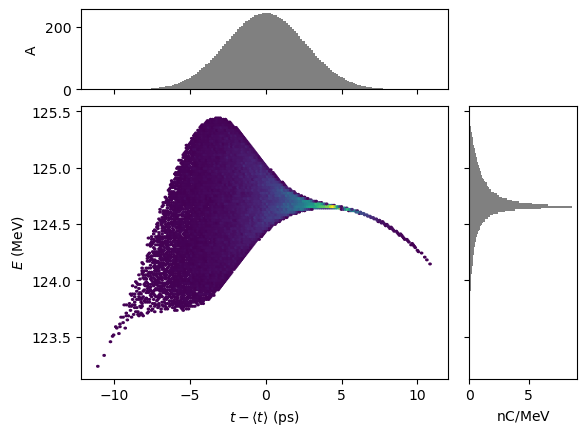

In [13]:
## Passing dictionary
lhDict = {
    "Elaser" : 1e-3,
    "case" : "Gaussian",
    "sigmat_laser" : 2e-12,
    "offset" : -4e-12
}


beamAfterLHmodulation, deltagamma, t = addLHmodulation(
    inputBeam, 
    **lhDict
)
beamAfterLHmodulation.plot('delta_t','energy');